In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle 
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dir_path="/content/drive/MyDrive/Brain Data/Training/"
path = os.listdir(dir_path)
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [ ]:
X = []
Y = []
for cls in classes:
    pth = dir_path+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

In [ ]:
def visualize_img(image_batch,label_batch):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.axis("off")

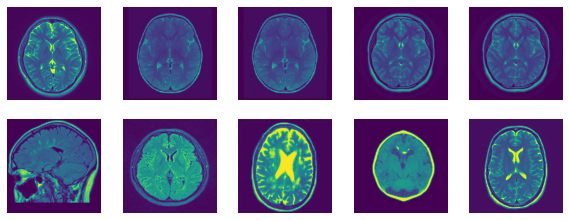

In [ ]:
visualize_img(X,classes)

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
x_train.shape, x_test.shape

((977, 40000), (245, 40000))

In [ ]:
#Feature Scaling
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test = x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
#Feature Selection: PCA
print(x_train.shape, x_test.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

(977, 40000) (245, 40000)


In [ ]:
print(pca_train.shape, pca_test.shape)
print(pca.n_components_)
print(pca.n_features_)

(977, 617) (245, 617)
617
40000


In [ ]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(pca_train, y_train)

SVC()

In [ ]:
pca_train.shape

(977, 617)

In [ ]:
#Evaluation
print("LG Training Score:", lg.score(pca_train, y_train))
print("LG Testing Score:", lg.score(pca_test, y_test))
print("SV Training Score:", sv.score(pca_train, y_train))
print("SV Testing Score:", sv.score(pca_test, y_test))

LG Training Score: 1.0
LG Testing Score: 0.9428571428571428
SV Training Score: 0.9959058341862845
SV Testing Score: 0.9428571428571428


In [ ]:
#Prediction

In [ ]:
pca_test.shape

(245, 617)

In [ ]:
pred = sv.predict(pca_test)
np.where(y_test != pred)

(array([ 42,  51,  53,  56,  89,  99, 112, 123, 142, 159, 169, 172, 184,
        204]),)

In [ ]:
#Test Model

In [ ]:
dec = {0: 'No tumour', 1: 'Positive tumour'}

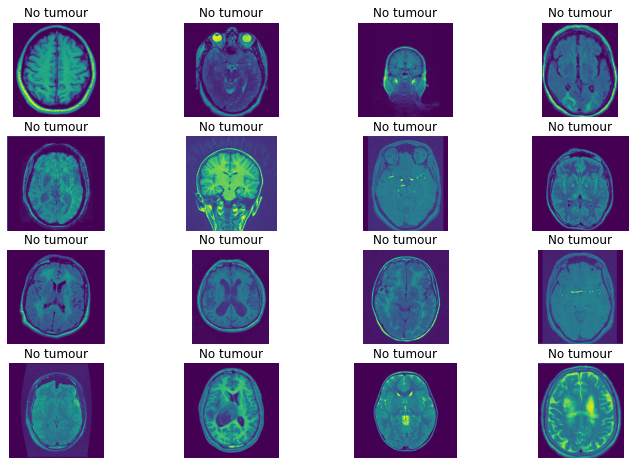

In [ ]:
plt.figure(figsize=(12,8))
dir_path="/content/drive/MyDrive/Brain Data/Testing/"
p = os.listdir(dir_path)
c=1
for i in os.listdir(dir_path+"no_tumor")[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread(dir_path+"no_tumor/" + i, 0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    pca_test = pca.transform(img1)
    p = sv.predict(pca_test)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1  

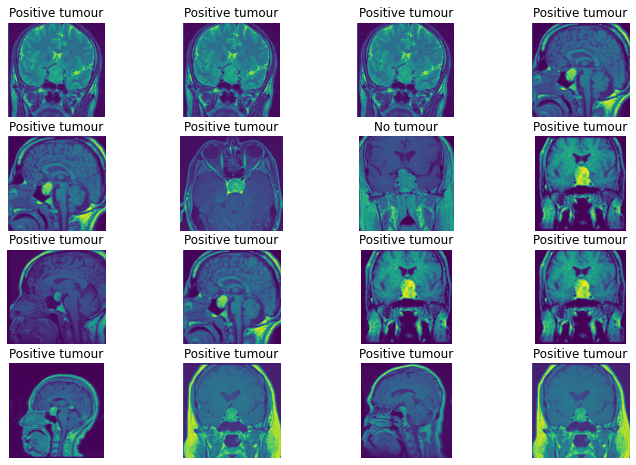

In [ ]:
plt.figure(figsize=(12,8))
dir_path="/content/drive/MyDrive/Brain Data/Testing/"
p = os.listdir(dir_path)
c=1
for i in os.listdir(dir_path+"pituitary_tumor")[:16]:
  plt.subplot(4,4,c)
  img = cv2.imread(dir_path+"pituitary_tumor/" + i, 0)
  img1 = cv2.resize(img, (200,200))
  img1 = (img1.reshape(1,-1))/255
  pca_test = pca.transform(img1)
  p = sv.predict(pca_test)
  plt.title(dec[p[0]])
  plt.imshow(img)
  plt.axis('off')
  c+=1      